In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

plt.rcParams['text.usetex'] = True
d_set = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]

x_axis = np.log2(d_set)
plt.rcParams.update({'font.size': 15})

In [20]:
difom, prox, smd = np.zeros((3, len(d_set))), np.zeros((3, len(d_set))), np.zeros((3, len(d_set)))

for t in range(len(d_set)):
    loss_difom = np.loadtxt("./data/save_para/loss" + str(d_set[t]) + "_difom.csv")
    loss_prox = np.loadtxt("./data/save_para/loss" + str(d_set[t]) + "_prox.csv")
    loss_smd = np.loadtxt("./data/save_para/loss" + str(d_set[t]) + "_smd.csv")
    M, num_exp = np.shape(loss_difom)
    difom_delta, prox_delta, smd_delta = loss_difom[0, 0], loss_prox[0, 0], loss_smd[0, 0]
    loss_difom = loss_difom / difom_delta
    loss_prox = loss_prox / prox_delta
    loss_smd = loss_smd / smd_delta
    M = M - 1
    difom[0, t], prox[0, t], smd[0, t] = np.mean(loss_difom[M, :]), np.mean(loss_prox[M, :]), np.mean(loss_smd[M, :])
    
    for i in range(num_exp):
        difom[1, t] += np.mean(loss_difom[np.random.randint(1, M+1, size = 20), i])
        prox[1, t] += np.mean(loss_prox[np.random.randint(1, M+1, size = 20), i])
        smd[1, t] += np.mean(loss_smd[np.random.randint(1, M+1, size = 20), i])
    difom[1, t], prox[1, t], smd[1, t] = difom[1, t] / num_exp, prox[1, t]/num_exp, smd[1, t] / num_exp
    
    difom[2, t], prox[2, t], smd[2, t] = np.mean(np.min(loss_difom, axis = 0)), np.mean(np.min(loss_prox, axis = 0)), np.mean(np.min(loss_smd, axis = 0))


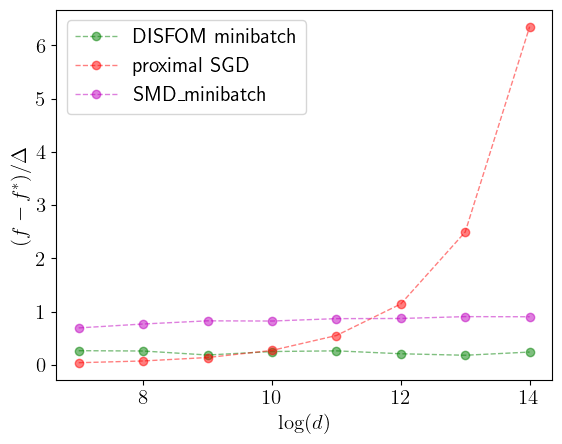

[0.26780251 0.261677   0.18657259 0.25184988 0.26471793 0.21002534
 0.18190192 0.24206883] [0.0419374  0.07492702 0.13947036 0.27267327 0.55252477 1.14477104
 2.49615964 6.34780576] [0.69515207 0.76848544 0.82801341 0.8241496  0.86918108 0.8721884
 0.90697845 0.90445034]


In [ ]:

plt.xlabel(r"$\log(d)$")
plt.ylabel(r"$(f-f^*) / \Delta$")
plt.plot(x_axis, difom[1,:], 'go--', alpha=0.5, linewidth=1, label='DISFOM minibatch ')
plt.plot(x_axis, prox[1,:], 'ro--', alpha=0.5, linewidth=1, label='proximal SGD')
plt.plot(x_axis, smd[1,:], 'mo--', alpha=0.5, linewidth=1, label='SMD_minibatch') 
plt.legend()
plt.savefig('case1_gap_minibatch.pdf', bbox_inches = 'tight')
plt.show()
print(difom[1,:], prox[1,:], smd[1,:])

In [22]:
svrg, difom_svrg, smd_svrg = np.zeros((3, len(d_set))), np.zeros((3, len(d_set))), np.zeros((3, len(d_set)))


for t in range(len(d_set)):
    loss_difom_svrg = np.loadtxt("./data/save_para/loss" + str(d_set[t]) + "_difom_svrg.csv")
    loss_svrg = np.loadtxt("./data/save_para/loss" + str(d_set[t]) + "_svrg.csv")
    loss_smd_svrg = np.loadtxt("./data/save_para/loss" + str(d_set[t]) + "_smd_svrg.csv")
    M_svrg, num_exp = np.shape(loss_difom_svrg)
    difom_svrg_delta, svrg_delta, smd_svrg_delta = loss_difom_svrg[0, 0], loss_svrg[0, 0], loss_smd_svrg[0, 0]
    loss_difom_svrg = loss_difom_svrg / difom_svrg_delta
    loss_svrg = loss_svrg / svrg_delta
    loss_smd_svrg = loss_smd_svrg / smd_svrg_delta
    M_svrg = M_svrg - 1
    difom_svrg[0, t], svrg[0, t], smd_svrg[0, t] = np.mean(loss_difom_svrg[M_svrg, :]), np.mean(loss_svrg[M_svrg, :]), np.mean(loss_smd_svrg[M_svrg, :])
    
    for i in range(num_exp):
        svrg[1, t] += np.mean(loss_svrg[np.random.randint(1, M_svrg+1, size = 90), i])
        difom_svrg[1, t] += np.mean(loss_difom_svrg[np.random.randint(1, M_svrg+1, size = 90), i])
        smd_svrg[1, t] += np.mean(loss_smd_svrg[np.random.randint(1, M_svrg+1, size = 90), i])
    difom_svrg[1, t], svrg[1, t], smd_svrg[1, t] = difom_svrg[1, t] / num_exp, svrg[1, t]/num_exp, smd_svrg[1, t] / num_exp
    
    difom_svrg[2, t], svrg[2, t], smd_svrg[2, t] = np.mean(np.min(loss_difom_svrg, axis = 0)), np.mean(np.min(loss_svrg, axis = 0)), np.mean(np.min(loss_smd_svrg, axis = 0))

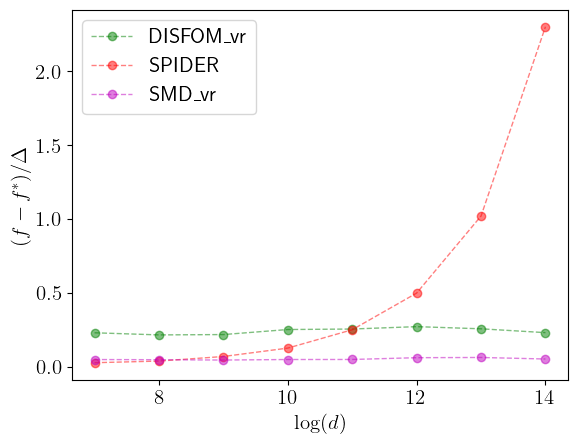

[0.23030291 0.21589006 0.21824221 0.25236081 0.25572713 0.27191426
 0.25721943 0.23123515] [0.02760805 0.0387134  0.06969232 0.12654177 0.25092015 0.49903572
 1.02082944 2.30269149] [0.04912199 0.04791746 0.04570235 0.04930761 0.04956352 0.06165545
 0.0631141  0.05276653]


In [ ]:

plt.xlabel(r"$\log(d)$")
plt.ylabel(r"$(f-f^*) / \Delta$")
plt.plot(x_axis, difom_svrg[1,:], 'go--', alpha=0.5, linewidth=1, label='DISFOM_vr')
plt.plot(x_axis, svrg[1,:], 'ro--', alpha=0.5, linewidth=1, label='SPIDER')
plt.plot(x_axis, smd_svrg[1,:], 'mo--', alpha=0.5, linewidth=1, label='SMD_vr') 
plt.legend()
plt.savefig('case1_gap_svrg.pdf', bbox_inches = 'tight')
plt.show()
print(difom_svrg[1,:], svrg[1,:], smd_svrg[1,:])

In [ ]:
difom, prox, smd = np.zeros((3, len(d_set))), np.zeros((3, len(d_set))), np.zeros((3, len(d_set)))


for t in range(len(d_set)):
    measure_difom = np.loadtxt("./data/save_para/fo_measure" + str(d_set[t]) + "_difom.csv")
    measure_prox = np.loadtxt("./data/save_para/fo_measure" + str(d_set[t]) + "_prox.csv")
    measure_smd = np.loadtxt("./data/save_para/fo_measure" + str(d_set[t]) + "_smd.csv")
    difom_delta, prox_delta, smd_delta = measure_difom[0, 0], measure_prox[0, 0], measure_smd[0, 0]
    M, num_exp = np.shape(measure_difom)
    M = M - 1
    difom[0, t], prox[0, t], smd[0, t] = np.mean(measure_difom[M, :]), np.mean(measure_prox[M, :]), np.mean(measure_smd[M, :])
    
    for i in range(num_exp):
        difom[1, t] += np.mean(measure_difom[np.random.randint(1, M+1, size = 20), i])
        prox[1, t] += np.mean(measure_prox[np.random.randint(1, M+1, size = 20), i])
        smd[1, t] += np.mean(measure_smd[np.random.randint(1, M+1, size = 20), i])
    difom[1, t], prox[1, t], smd[1, t] = difom[1, t] / num_exp, prox[1, t]/num_exp, smd[1, t] / num_exp
    
    difom[2, t], prox[2, t], smd[2, t] = np.mean(np.min(measure_difom[1:M, :], axis = 0)), np.mean(np.min(measure_prox[1:M, :], axis = 0)), np.mean(np.min(measure_smd[1:M, :], axis = 0))

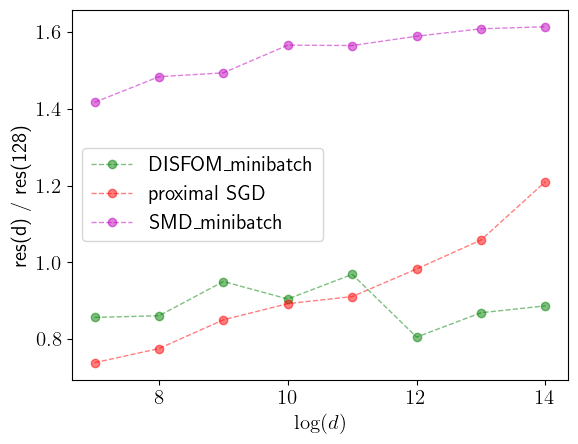

[0.85675549 0.86096368 0.95010274 0.90463351 0.96871258 0.80546131
 0.8689078  0.88670291] [0.73876966 0.7755912  0.85037106 0.89249432 0.91091139 0.9828208
 1.05819085 1.20999608] [1.41644571 1.4831315  1.49325826 1.56530616 1.56427871 1.58853975
 1.60790367 1.61327167]


In [ ]:

plt.xlabel(r"$\log(d)$")
plt.ylabel(r"res(d) / res(128)")
plt.plot(x_axis, difom[1,:], 'go--', alpha=0.5, linewidth=1, label='DISFOM_minibatch')
plt.plot(x_axis, prox[1,:], 'ro--', alpha=0.5, linewidth=1, label='proximal SGD')
plt.plot(x_axis, smd[1,:], 'mo--', alpha=0.5, linewidth=1, label='SMD_minibatch') 
plt.legend()
plt.savefig('case1_norm_minibatch.pdf', bbox_inches = 'tight')
plt.show()
print(difom[1,:], prox[1,:], smd[1,:])

In [14]:
difom_svrg, svrg, smd_svrg = np.zeros((3, len(d_set))), np.zeros((3, len(d_set))), np.zeros((3, len(d_set)))


for t in range(len(d_set)):
    measure_difom_svrg = np.loadtxt("./data/save_para/fo_measure" + str(d_set[t]) + "_difom_svrg.csv")
    measure_svrg = np.loadtxt("./data/save_para/fo_measure" + str(d_set[t]) + "_svrg.csv")
    measure_smd_svrg = np.loadtxt("./data/save_para/fo_measure" + str(d_set[t]) + "_smd_svrg.csv")
    difom_delta, prox_delta, smd_delta = measure_difom_svrg[0, 0], measure_svrg[0, 0], measure_smd_svrg[0, 0]
    measure_difom_svrg = measure_difom_svrg #/ difom_delta
    measure_svrg = measure_svrg #/ prox_delta
    measure_smd_svrg = measure_smd_svrg #/ smd_delta
    M_svrg, num_exp = np.shape(measure_difom_svrg)
    M_svrg = M_svrg - 1
    difom_svrg[0, t], svrg[0, t], smd_svrg[0, t] = np.mean(measure_difom_svrg[M_svrg, :]), np.mean(measure_svrg[M_svrg, :]), np.mean(measure_smd_svrg[M_svrg, :])
    for i in range(num_exp):
        difom_svrg[1, t] += np.mean(measure_difom_svrg[np.random.randint(1, M_svrg+1, size = 90), i])
        svrg[1, t] += np.mean(measure_svrg[np.random.randint(1, M_svrg+1, size = 90), i])
        smd_svrg[1, t] += np.mean(measure_smd_svrg[np.random.randint(1, M_svrg+1, size = 90), i])
    difom_svrg[1, t], svrg[1, t], smd_svrg[1, t] = difom_svrg[1, t] / num_exp, svrg[1, t]/num_exp, smd_svrg[1, t] / num_exp
    difom_svrg[2, t], svrg[2, t], smd_svrg[2, t] = np.mean(np.min(measure_difom_svrg[1:M_svrg, :], axis = 0)), np.mean(np.min(measure_svrg[1:M_svrg, :], axis = 0)), np.mean(np.min(measure_smd_svrg[1:M_svrg, :], axis = 0))


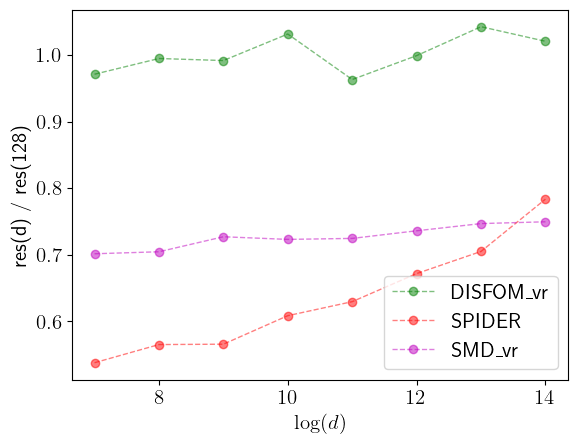

[0.97106206 0.99466071 0.9915778  1.03137562 0.96309926 0.99895842
 1.04236955 1.02051659] [0.53796669 0.56521829 0.56577878 0.60856989 0.62961033 0.6717752
 0.7050094  0.7835342 ] [0.70152019 0.70452827 0.72705934 0.72309366 0.72458879 0.73602572
 0.74683703 0.74952911]


In [ ]:

plt.xlabel(r"$\log(d)$")
plt.ylabel(r"res(d) / res(128)")
plt.plot(x_axis, difom_svrg[1,:], 'go--', alpha=0.5, linewidth=1, label='DISFOM_vr')
plt.plot(x_axis, svrg[1,:], 'ro--', alpha=0.5, linewidth=1, label='SPIDER') 
plt.plot(x_axis, smd_svrg[1,:], 'mo--', alpha=0.5, linewidth=1, label='SMD_vr') 
plt.legend()
plt.savefig('case1_norm_svrg.pdf', bbox_inches = 'tight')
plt.show()
print(difom_svrg[1,:], svrg[1,:], smd_svrg[1,:])

In [ ]:
difom, prox, smd = np.zeros((3, len(d_set))), np.zeros((3, len(d_set))), np.zeros((3, len(d_set)))
for t in range(len(d_set)):
    measure_difom = np.loadtxt("./data/save_para/l2" + str(d_set[t]) + "_difom.csv")
    measure_prox = np.loadtxt("./data/save_para/l2" + str(d_set[t]) + "_prox.csv")
    measure_smd = np.loadtxt("./data/save_para/l2" + str(d_set[t]) + "_smd.csv")
    M, num_exp = np.shape(measure_difom)
    M = M - 1
    difom[0, t], prox[0, t], smd[0, t] = np.mean(measure_difom[M, :]), np.mean(measure_prox[M, :]), np.mean(measure_smd[M, :])
    
    for i in range(num_exp):
        difom[1, t] += np.mean(measure_difom[np.random.randint(1, M+1, size = 20), i])
        prox[1, t] += np.mean(measure_prox[np.random.randint(1, M+1, size = 20), i])
        smd[1, t] += np.mean(measure_smd[np.random.randint(1, M+1, size = 20), i])
    difom[1, t], prox[1, t], smd[1, t] = difom[1, t] / num_exp, prox[1, t]/num_exp, smd[1, t] / num_exp
    


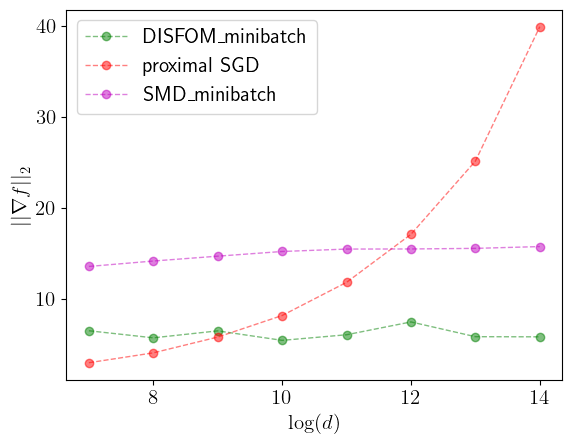

[6.47009794 5.69345328 6.45772823 5.41499483 6.0307987  7.44152877
 5.81870187 5.80320065] [ 2.95489337  4.04052963  5.77659149  8.14808356 11.79854731 17.08205653
 25.1346719  39.91860289] [13.54582532 14.14180155 14.67637768 15.19140666 15.45760025 15.46885712
 15.53386592 15.73188765]


In [ ]:
plt.xlabel(r"$\log(d)$")
plt.ylabel(r"$|| \nabla f||_{2}$")
plt.plot(x_axis, difom[1,:], 'go--', alpha=0.5, linewidth=1, label='DISFOM_minibatch')
plt.plot(x_axis, prox[1,:], 'ro--', alpha=0.5, linewidth=1, label='proximal SGD')
plt.plot(x_axis, smd[1,:], 'mo--', alpha=0.5, linewidth=1, label='SMD_minibatch') 
plt.legend()
plt.savefig('case1_norm2_minibatch.pdf', bbox_inches = 'tight')
plt.show()

In [26]:
difom_svrg, svrg, smd_svrg = np.zeros((3, len(d_set))), np.zeros((3, len(d_set))), np.zeros((3, len(d_set)))


for t in range(len(d_set)):
    measure_difom_svrg = np.loadtxt("./data/save_para/l2" + str(d_set[t]) + "_difom_svrg.csv")
    measure_svrg = np.loadtxt("./data/save_para/l2" + str(d_set[t]) + "_svrg.csv")
    measure_smd_svrg = np.loadtxt("./data/save_para/l2" + str(d_set[t]) + "_smd_svrg.csv")
    difom_delta, prox_delta, smd_delta = measure_difom_svrg[0, 0], measure_svrg[0, 0], measure_smd_svrg[0, 0]
    M_svrg, num_exp = np.shape(measure_difom_svrg)
    M_svrg = M_svrg - 1
    difom_svrg[0, t], svrg[0, t], smd_svrg[0, t] = np.mean(measure_difom_svrg[M_svrg, :]), np.mean(measure_svrg[M_svrg, :]), np.mean(measure_smd_svrg[M_svrg, :])
    for i in range(num_exp):
        difom_svrg[1, t] += np.mean(measure_difom_svrg[np.random.randint(1, M_svrg+1, size = 90), i])
        svrg[1, t] += np.mean(measure_svrg[np.random.randint(1, M_svrg+1, size = 90), i])
        smd_svrg[1, t] += np.mean(measure_smd_svrg[np.random.randint(1, M_svrg+1, size = 90), i])
    difom_svrg[1, t], svrg[1, t], smd_svrg[1, t] = difom_svrg[1, t] / num_exp, svrg[1, t]/num_exp, smd_svrg[1, t] / num_exp
    difom_svrg[2, t], svrg[2, t], smd_svrg[2, t] = np.mean(np.min(measure_difom_svrg[1:M_svrg, :], axis = 0)), np.mean(np.min(measure_svrg[1:M_svrg, :], axis = 0)), np.mean(np.min(measure_smd_svrg[1:M_svrg, :], axis = 0))


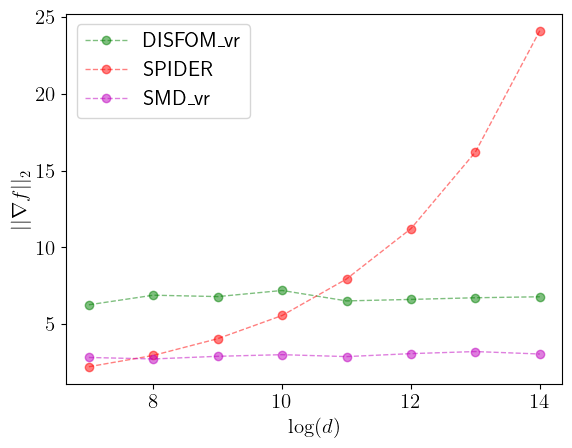

[6.25501203 6.87914471 6.78950835 7.18733843 6.50774939 6.60403029
 6.71299174 6.77682099] [ 2.21985367  2.95514395  4.04678771  5.55696024  7.93879094 11.21724328
 16.20689518 24.11089604] [2.82249629 2.72561536 2.89846949 3.00485808 2.87919058 3.07279338
 3.20781984 3.04819504]


In [ ]:
plt.xlabel(r"$\log(d)$")
plt.ylabel(r"$||\nabla f||_{2}$")
plt.plot(x_axis, difom_svrg[1,:], 'go--', alpha=0.5, linewidth=1, label='DISFOM_vr') #row=0, col=1
plt.plot(x_axis, svrg[1,:], 'ro--', alpha=0.5, linewidth=1, label='SPIDER') #row=0, col=1
plt.plot(x_axis, smd_svrg[1,:], 'mo--', alpha=0.5, linewidth=1, label='SMD_vr') 
plt.legend()
plt.savefig('case1_norm2_svrg.pdf', bbox_inches = 'tight')
plt.show()
print(difom_svrg[1,:], svrg[1,:], smd_svrg[1,:])

[ 6.  7.  8.  9. 10. 11. 12. 13.] [np.float64(0.5148347440408543), np.float64(1.0545031919609755), np.float64(2.3047756450250745), np.float64(4.914699415909126), np.float64(10.262507108971477), np.float64(20.008656364050694), np.float64(46.617741352063604), np.float64(96.73334817704745)] [np.float64(5.148398848949), np.float64(7.4373492010636255), np.float64(9.433339711977169), np.float64(10.282284418935888), np.float64(9.498701659962535), np.float64(200.08684915699996), np.float64(466.1782338229241), np.float64(967.3341890890151)]


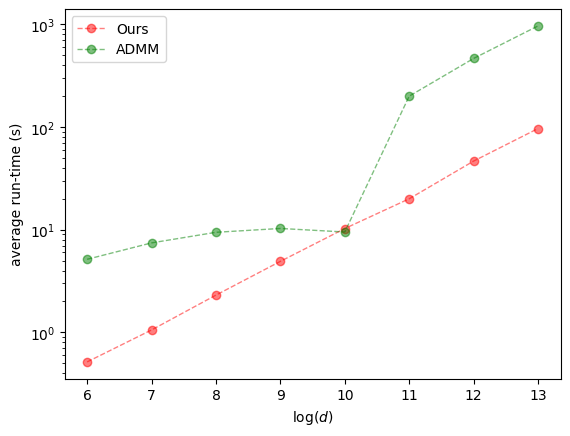

In [ ]:
import numpy as np, time, csv, datetime, argparse, sys
from pathlib import Path
import matplotlib.pyplot as plt
csv_path = "./result_sqL1.csv"


data = np.genfromtxt(csv_path, delimiter=",", skip_header=1)
d_col       = data[:,0]
time_exact  = data[:,2]
time_admm   = data[:,3]
F_exact     = data[:,4]
F_admm      = data[:,5]

unique_d = np.unique(d_col)
avg_time_exact = [time_exact[d_col==d].mean() for d in unique_d]
avg_time_admm  = [time_admm [d_col==d].mean() for d in unique_d]
avg_Fgap       = [np.abs(F_admm[d_col==d] - F_exact[d_col==d]).mean()
                  for d in unique_d]

x_axis_new = np.log2(unique_d)
print(np.log2(unique_d), avg_time_exact, avg_time_admm)
plt.xlabel(r"$\log(d)$")
plt.ylabel("average run-time (s)")
plt.semilogy(x_axis_new, avg_time_exact, 'ro--', alpha=0.5, linewidth=1, label="Ours")
plt.semilogy(x_axis_new, avg_time_admm , 'go--', alpha=0.5, linewidth=1, label="ADMM")
plt.legend()
plt.savefig("case2_time.pdf")


[ 6.  7.  8.  9. 10. 11. 12. 13.] [np.float64(0.00041914321482181547), np.float64(0.000419199513271451), np.float64(0.00046842913143336774), np.float64(0.0005378344212658703), np.float64(0.0006276028114371001), np.float64(0.0008111106231808663), np.float64(0.0011971842031925917), np.float64(0.0019396309158764779)] [np.float64(0.008127912192139774), np.float64(0.009203779813833534), np.float64(0.010941982094664127), np.float64(0.012830863287672401), np.float64(0.015681582584511487), np.float64(0.019940269307699054), np.float64(0.14205900187371298), np.float64(0.04570113392546773)]


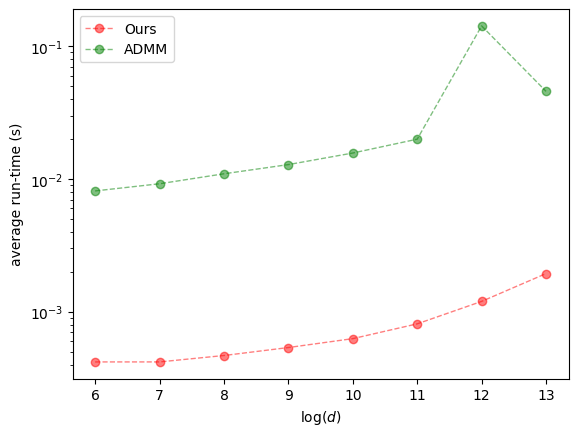

In [ ]:
import numpy as np, time, csv, datetime, argparse, sys
from pathlib import Path
import matplotlib.pyplot as plt
csv_path = "./result_box.csv"


data = np.genfromtxt(csv_path, delimiter=",", skip_header=1)
d_col       = data[:,0]
time_exact  = data[:,2]
time_admm   = data[:,3]
F_exact     = data[:,4]
F_admm      = data[:,5]
mu = data[:, 6]

unique_d = np.unique(d_col)
avg_time_exact = [time_exact[d_col==d].mean() for d in unique_d]
avg_time_admm  = [time_admm [d_col==d].mean() for d in unique_d]
avg_Fgap       = [np.abs(F_admm[d_col==d] - F_exact[d_col==d]).mean()
                  for d in unique_d]

x_axis_new = np.log2(unique_d)
print(np.log2(unique_d), avg_time_exact, avg_time_admm)
plt.xlabel(r"$\log(d)$")
plt.ylabel("average run-time (s)")
plt.semilogy(x_axis_new, avg_time_exact, 'ro--', alpha=0.5, linewidth=1, label="Ours")
plt.semilogy(x_axis_new, avg_time_admm , 'go--', alpha=0.5, linewidth=1, label="ADMM")
plt.legend()
plt.savefig("case1_time.pdf")
